In [1]:
from Detector import Detector
import plotly.graph_objects as go
from Particle import Particle
from GEANT5 import GEANT5
import numpy as np

# Create detector
detector = Detector()
GEANT5 = GEANT5()

# Print detector information
print(detector.get_detector_info())

Detector Configuration:
Number of modules: 40
Total length: 5560.0 mm
Plane dimensions: 4191.0 x 4839.3 mm
Module spacing: 20.0 mm
Module gap: 40.0 mm

Module structure:
- X plane
- U plane (+60°)
- X plane
- V plane (-60°)


In [2]:
momentum_vector = np.array([0.0, 0.0, 150.0])
#momentum_vector = np.array([ 24.61115935, -15.40898593,  51.49623097])
rest_mass = 105.66
energy = np.sqrt(np.linalg.norm(momentum_vector)**2 + rest_mass**2)
KE = energy - rest_mass
print(f"KE: {KE} MeV")
print(f"Energy: {energy} MeV")
test_particle = Particle(rest_mass, momentum_vector, 105.66 + KE, np.array([0, 0, -1000]))
muon_hits = GEANT5.track_muon(detector, test_particle)

KE: 77.81761607346004 MeV
Energy: 183.47761607346004 MeV


/global/cfs/cdirs/dune/www/data/2x2/simulation/rvizarr_dev/UofR/FinalProject/GEANT5.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  return 0*np.sqrt(2)*(13.6/(momentum*particle.get_beta()))*np.sqrt(t)*(1 + 0.038*np.log(t))
/global/cfs/cdirs/dune/www/data/2x2/simulation/rvizarr_dev/UofR/FinalProject/GEANT5.py:43: RuntimeWarning: invalid value encountered in scalar multiply
  return 0*np.sqrt(2)*(13.6/(momentum*particle.get_beta()))*np.sqrt(t)*(1 + 0.038*np.log(t))
/global/cfs/cdirs/dune/www/data/2x2/simulation/rvizarr_dev/UofR/FinalProject/GEANT5.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  dEdX = -1*1.060*K*z**2*(0.53768)*(1/beta**2)*(0.5*np.log(2*ELECTRON_MASS*(beta*gamma)**2*Tmax/I_mean**2) - beta**2 - delta/2)
/global/cfs/cdirs/dune/www/data/2x2/simulation/rvizarr_dev/UofR/FinalProject/GEANT5.py:34: RuntimeWarning: divide by zero encountered in log
  dEdX = -1*1.060*K*z**2*(0.53768)*(1/beta**2)*(0.5*np.log(2*ELECTRON_MASS*(beta*gamma)**2*

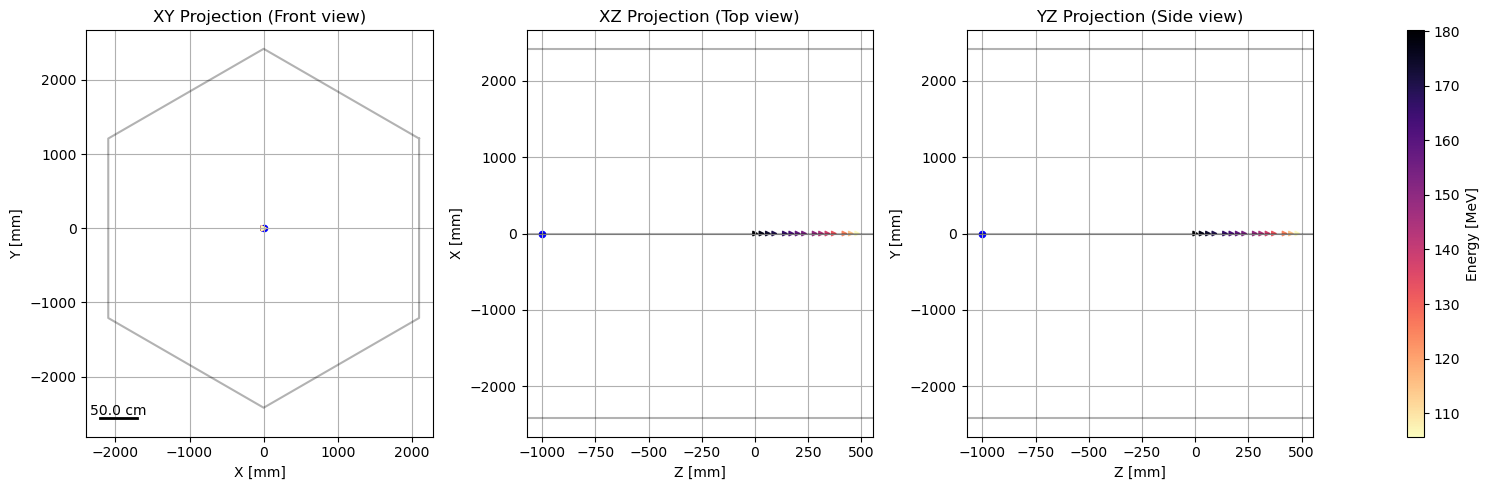

In [4]:
fig = detector.visualize_hits_projections(muon_hits)

In [5]:
start = muon_hits[0]['hit_position']
final = muon_hits[-1]['hit_position']
last_module = muon_hits[-1]['module']
last_interplane_dist = 0
if muon_hits[-1]['plane_orientation'] == 'V':
    last_interplane_dist = 3*20
elif muon_hits[-1]['plane_orientation'] == 'U':
    last_interplane_dist = 1*20
elif muon_hits[-2]['module'] == last_module and muon_hits[-1]['plane_orientation'] == 'X':
    last_interplane_dist = 2*20
track_length = np.linalg.norm(final-start) - muon_hits[-1]['module']*40 - 60*muon_hits[-1]['module'] - last_interplane_dist + 10
density = 1.06 #1.06
print(str(density*track_length/10) + " g/cm2 CSDA") 

15.9 g/cm2 CSDA


In [7]:
muon_hits[-1]

{'module': 34,
 'plane_orientation': 'X',
 'strip': <Strip.Strip at 0x7fa1fab80190>,
 'hit_position': array([  -7.03570239,   -8.37416005, 4760.        ]),
 'intersection_point': [-7.035702385008494, -8.37416004827107, 4760.0],
 'pmt_distance': 2428.049138221993,
 'energy': 105.66,
 'dEdX': -75.5107088272993,
 'energy_deposit': 2.688864905705344,
 'KE': 0.0,
 'momentum_vector': array([-0., -0.,  0.]),
 'photons': 21637,
 'collected': False,
 'charge': 5781.21537795,
 'discriminator': True,
 'adc': 813,
 'contained': True}

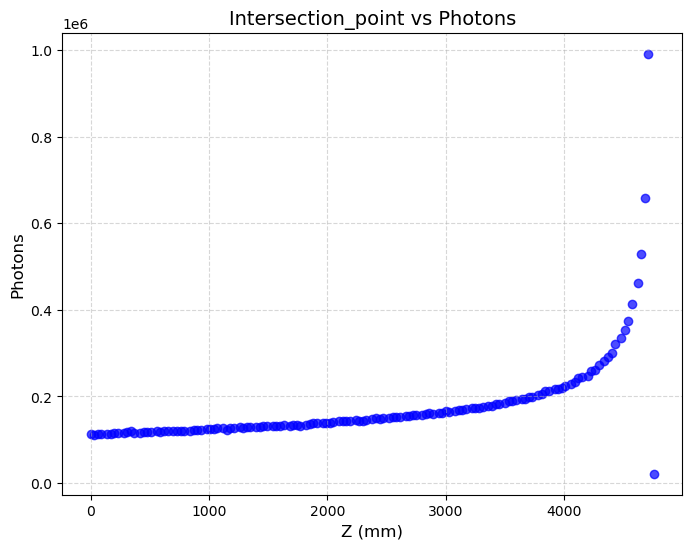

In [6]:
GEANT5.plot_from_dict(muon_hits,'intersection_point','photons','Z (mm)', 'Photons')

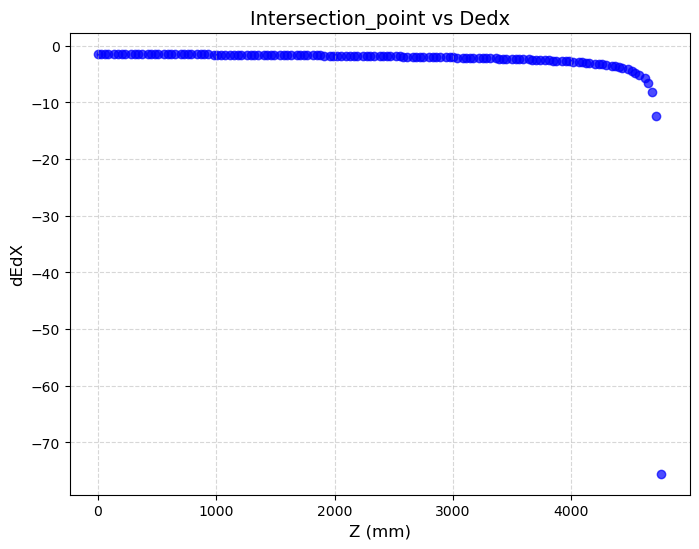

In [8]:
GEANT5.plot_from_dict(muon_hits,'intersection_point','dEdX','Z (mm)', 'dEdX')

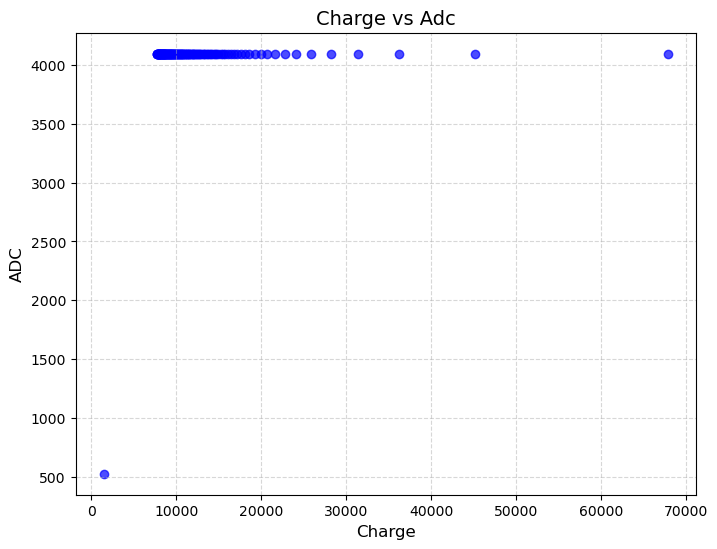

In [9]:
GEANT5.plot_from_dict(muon_hits,'charge','adc','Charge', 'ADC')

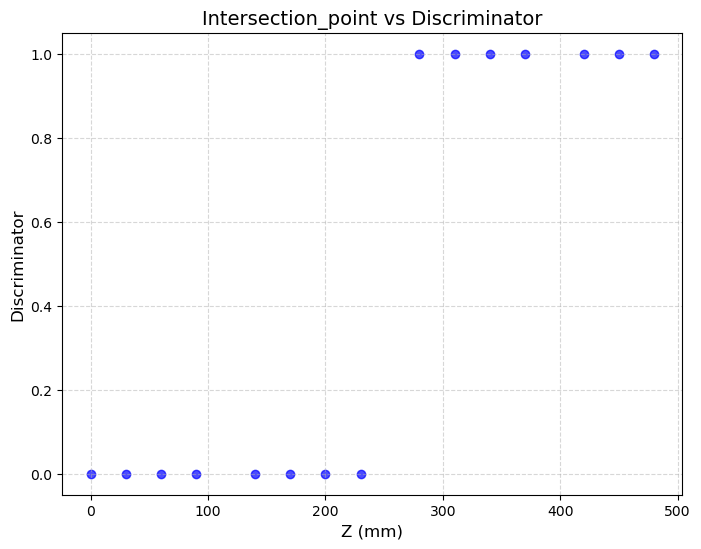

In [58]:
GEANT5.plot_from_dict(muon_hits,'intersection_point','discriminator','Z (mm)', 'Discriminator')

In [33]:
x = lambda ML : ML**2/(4*60*7000)
p = lambda x : x*7000 - 60
E = lambda x : x*7000 + 60
beta = lambda p, E : abs(p/E)
gamma = lambda beta: 1/np.sqrt(1-beta**2)
theta = lambda beta, gamma : np.arctan(1/(beta*gamma))

In [35]:
ML = np.array([50,200,500,1000])
print(x(ML))
print(p(x(ML)))
print(E(x(ML)))
a, b = p(x(ML)), E(x(ML))
c = beta(a,b)
print(c)
d = gamma(c)
print(d)
theta(c, d)*180/np.pi

[0.0014881  0.02380952 0.14880952 0.5952381 ]
[ -49.58333333  106.66666667  981.66666667 4106.66666667]
[  70.41666667  226.66666667 1101.66666667 4226.66666667]
[0.70414201 0.47058824 0.89107413 0.97160883]
[1.40833333 1.13333333 2.20333333 4.22666667]


array([45.2397299 , 61.92751306, 26.99146656, 13.68554683])

In [38]:
3*np.pi*128

1206.3715789784806